In [28]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt

In [29]:
data = keras.datasets.fashion_mnist

In [30]:
Catagories = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",
5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

In [31]:
(X_train,y_train),(X_test,y_test) = data.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_test.shape

(10000, 28, 28)

'T-shirt/top'

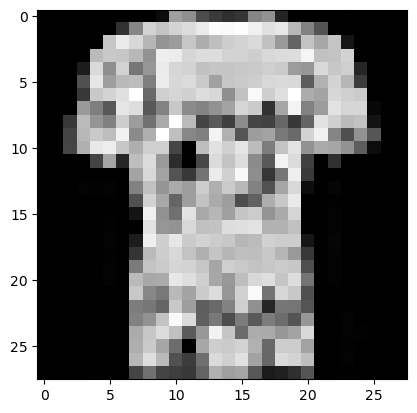

In [111]:
i = 400 #Select the img number
plt.imshow(X_test[i],cmap = 'gray')
Catagories[y_test[i]]

In [35]:
X_tr = X_train.reshape(len(X_train),-1)
X_te = X_test.reshape(len(X_test),-1)

In [36]:
X_tr = X_tr/255.0
X_te = X_te/255.0

In [37]:
input_ = keras.layers.Input(shape=(784,))
bt = keras.layers.BatchNormalization()(input_)
dp= keras.layers.Dropout(rate=0.2)(bt)
hidden1 = keras.layers.Dense(128,activation="relu")(dp)
bt1 = keras.layers.BatchNormalization()(hidden1)
dp1= keras.layers.Dropout(rate=0.2)(bt1)
hidden2 = keras.layers.Dense(128,activation="relu")(dp1)
Conc = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(10,activation="relu")(Conc)
model = keras.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 784)         3136        ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 784)          0           ['batch_normalization[0][0]']    
                                                                                                  
 dense (Dense)                  (None, 128)          100480      ['dropout[0][0]']            

In [117]:
model.compile(optimizer="sgd",
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [118]:
model.fit(X_tr,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2047 - accuracy: 0.9226
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1977 - accuracy: 0.9261
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1986 - accuracy: 0.9255
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1973 - accuracy: 0.9262
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1956 - accuracy: 0.9264
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1938 - accuracy: 0.9272
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1929 - accuracy: 0.9288
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1915 - accuracy: 0.9285
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1948 - accuracy: 0.9264
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.193

In [41]:
model.evaluate(X_te,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8960


[0.3102549612522125, 0.8960000276565552]

313/313 [==============================] - 0s 2ms/step
The predicted Fashion item is :  Coat


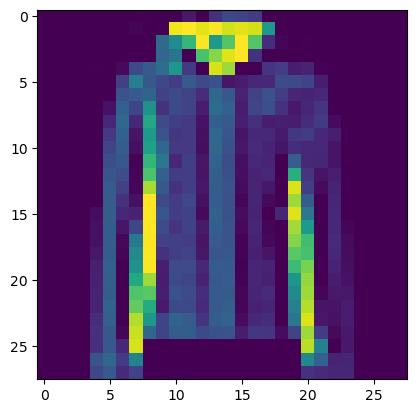

In [110]:
i =6 # Select Img number
p = model.predict(X_te)[i]
a = p.tolist()
max_number= max(a)
max_number
print("The predicted Fashion item is : ",Catagories[a.index(max_number)])
plt.imshow(X_test[i])

In [119]:
def predic(i):
    plt.subplot(2,10,i)
    p = model.predict(X_te,verbose=0)[i]
    p_ = X_test[i]
    a = p.tolist()
    max_number= max(a)
    max_number
    plt.imshow(X_test[i])
    plt.title(Catagories[a.index(max_number)])
    plt.imshow(p_,cmap='gray')
    #plt.axis('off')
    plt.show()
    i+=1

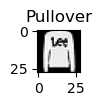

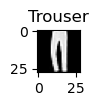

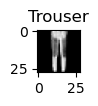

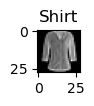

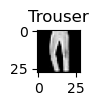

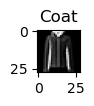

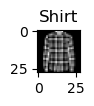

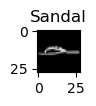

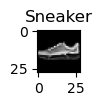

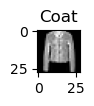

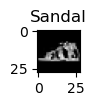

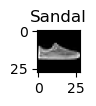

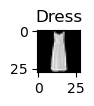

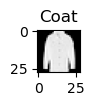

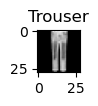

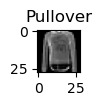

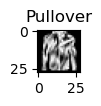

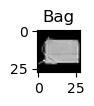

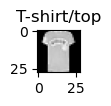

In [120]:
for i in range(1,20):  # predecting First 20 images
    predic(i)
    plt.show()